## Hay - Hair Healthy
Hair Loss Recognition Image Classification

## Overview

In this project, we built a hair damage recognition model that can recognize hair problems, based on a public dataset available on Kaggle. The dataset consists of 12 labels

## Import libraries necessary for this project.

In [21]:
import os
import tempfile

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image

import tensorflow as tf
import tensorflow_model_optimization as tfmot

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as keras_image

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback

## Overview the dataset

In [22]:
os.listdir()

['.git',
 'Hair Diseases - Final',
 'HayModels-Baseline.ipynb',
 'README.md',
 'res']

In [23]:
os.listdir("Hair Diseases - Final")

['test', 'train', 'val']

Inside Hair Diseases - Final folder there are 3 sub-folders, we can use training to train our model and testing to validate our model. And last validation to testing our model.

In [24]:
image_counts = {
    "Alopecia Areata": len(os.listdir('Hair Diseases - Final/train/Alopecia Areata')),
    "Contact Dermatitis": len(os.listdir('Hair Diseases - Final/train/Contact Dermatitis')),
    "Dry Hair": len(os.listdir('Hair Diseases - Final/train/Dry Hair')),
    "Folliculitis": len(os.listdir('Hair Diseases - Final/train/Folliculitis')),
    "Head Lice": len(os.listdir('Hair Diseases - Final/train/Head Lice')),
    "Healthy Hair": len(os.listdir('Hair Diseases - Final/train/Healthy Hair')),
    "Lichen Planus": len(os.listdir('Hair Diseases - Final/train/Lichen Planus')),
    "Male Pattern Baldness": len(os.listdir('Hair Diseases - Final/train/Male Pattern Baldness')),
    "Psoriasis": len(os.listdir('Hair Diseases - Final/train/Psoriasis')),
    "Seborrheic Dermatitis": len(os.listdir('Hair Diseases - Final/train/Seborrheic Dermatitis')),
    "Telogen Effluvium": len(os.listdir('Hair Diseases - Final/train/Telogen Effluvium')),
    "Tinea Capitis": len(os.listdir('Hair Diseases - Final/train/Tinea Capitis')),
}

for disease, count in image_counts.items():
    print(f"{disease}: {count}")

Alopecia Areata: 1000
Contact Dermatitis: 1000
Dry Hair: 1000
Folliculitis: 1000
Head Lice: 1000
Healthy Hair: 1082
Lichen Planus: 1000
Male Pattern Baldness: 1000
Psoriasis: 1000
Seborrheic Dermatitis: 1000
Telogen Effluvium: 1000
Tinea Capitis: 1000


In [25]:
image_counts = {
    "Alopecia Areata": len(os.listdir('Hair Diseases - Final/test/Alopecia Areata')),
    "Contact Dermatitis": len(os.listdir('Hair Diseases - Final/test/Contact Dermatitis')),
    "Dry Hair": len(os.listdir('Hair Diseases - Final/test/Dry Hair')),
    "Folliculitis": len(os.listdir('Hair Diseases - Final/test/Folliculitis')),
    "Head Lice": len(os.listdir('Hair Diseases - Final/test/Head Lice')),
    "Healthy Hair": len(os.listdir('Hair Diseases - Final/test/Healthy Hair')),
    "Lichen Planus": len(os.listdir('Hair Diseases - Final/test/Lichen Planus')),
    "Male Pattern Baldness": len(os.listdir('Hair Diseases - Final/test/Male Pattern Baldness')),
    "Psoriasis": len(os.listdir('Hair Diseases - Final/test/Psoriasis')),
    "Seborrheic Dermatitis": len(os.listdir('Hair Diseases - Final/test/Seborrheic Dermatitis')),
    "Telogen Effluvium": len(os.listdir('Hair Diseases - Final/test/Telogen Effluvium')),
    "Tinea Capitis": len(os.listdir('Hair Diseases - Final/test/Tinea Capitis')),
}

for disease, count in image_counts.items():
    print(f"{disease}: {count}")

Alopecia Areata: 120
Contact Dermatitis: 120
Dry Hair: 144
Folliculitis: 120
Head Lice: 120
Healthy Hair: 120
Lichen Planus: 120
Male Pattern Baldness: 120
Psoriasis: 120
Seborrheic Dermatitis: 120
Telogen Effluvium: 120
Tinea Capitis: 120


In [26]:
image_counts = {
    "Alopecia Areata": len(os.listdir('Hair Diseases - Final/val/Alopecia Areata')),
    "Contact Dermatitis": len(os.listdir('Hair Diseases - Final/val/Contact Dermatitis')),
    "Dry Hair": len(os.listdir('Hair Diseases - Final/val/Dry Hair')),
    "Folliculitis": len(os.listdir('Hair Diseases - Final/val/Folliculitis')),
    "Head Lice": len(os.listdir('Hair Diseases - Final/val/Head Lice')),
    "Healthy Hair": len(os.listdir('Hair Diseases - Final/val/Healthy Hair')),
    "Lichen Planus": len(os.listdir('Hair Diseases - Final/val/Lichen Planus')),
    "Male Pattern Baldness": len(os.listdir('Hair Diseases - Final/val/Male Pattern Baldness')),
    "Psoriasis": len(os.listdir('Hair Diseases - Final/val/Psoriasis')),
    "Seborrheic Dermatitis": len(os.listdir('Hair Diseases - Final/val/Seborrheic Dermatitis')),
    "Telogen Effluvium": len(os.listdir('Hair Diseases - Final/val/Telogen Effluvium')),
    "Tinea Capitis": len(os.listdir('Hair Diseases - Final/val/Tinea Capitis')),
}

for disease, count in image_counts.items():
    print(f"{disease}: {count}")

Alopecia Areata: 120
Contact Dermatitis: 120
Dry Hair: 120
Folliculitis: 120
Head Lice: 120
Healthy Hair: 120
Lichen Planus: 120
Male Pattern Baldness: 120
Psoriasis: 120
Seborrheic Dermatitis: 120
Telogen Effluvium: 120
Tinea Capitis: 120


## Visualizing some examples

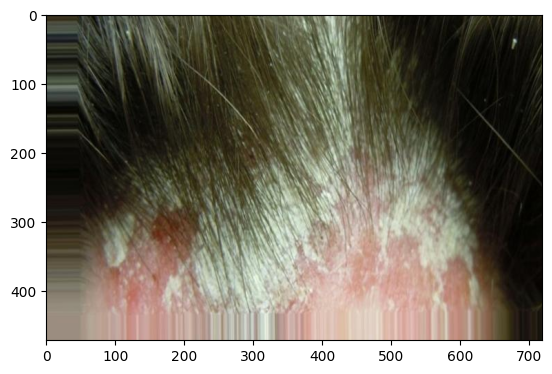

(472, 720, 3)


In [27]:
preview = plt_image.imread('Hair Diseases - Final/train/psoriasis/psoriasis_0005.jpg')
plt.imshow(preview)
plt.show()
print(preview.shape)

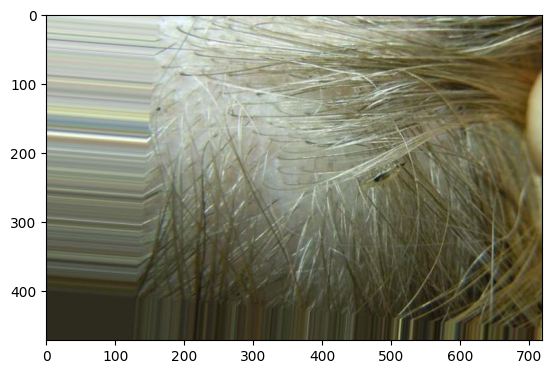

(472, 720, 3)


In [28]:
preview = plt_image.imread('Hair Diseases - Final/train/Head Lice/head_lice_0025.jpg')
plt.imshow(preview)
plt.show()
print(preview.shape)

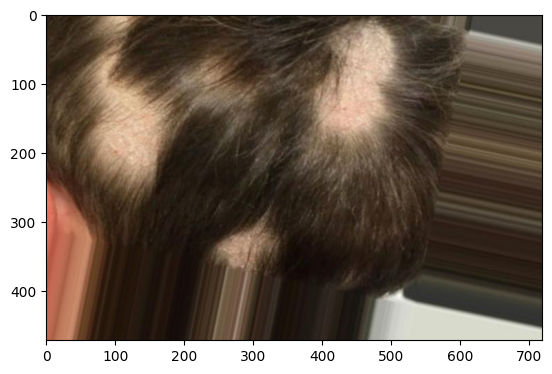

(472, 720, 3)


In [29]:
preview = plt_image.imread('Hair Diseases - Final/train/Tinea Capitis/tinea_capitis_0006.jpg')
plt.imshow(preview)
plt.show()
print(preview.shape)

## Define Dataset Folder

In [30]:
IMAGE_SIZE = [224, 224]

train_path = r'Hair Diseases - Final/train'
test_path = r'Hair Diseases - Final/test'
val_path = r'Hair Diseases - Final/val'

## Callback

In [31]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')
        if accuracy is not None and val_accuracy is not None:
            if accuracy > 0.95 and val_accuracy > 0.95:
                print("\nReached 95% accuracy and validation accuracy. Stop Training")
                self.model.stop_training = True

callbacks = CustomCallback()

## Build the Baseline Model CNN

In [32]:
inputs = Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(12, activation='softmax')(x)

## Transfer Learning

In [33]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top=False)

for layer in pre_trained_model.layers:
    layer.trainable = False

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(6, activation='softmax')(x)

model = Model(pre_trained_model.input, x) 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000001F232472D60>,input_4,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001F23248B520>,conv2d_100,False
2,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001F23248B3D0>,batch_normalization_94,False
3,<keras.layers.core.activation.Activation object at 0x000001F2324C6550>,activation_94,False
4,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001F2324B0AC0>,conv2d_101,False
...,...,...,...
306,<keras.layers.core.activation.Activation object at 0x000001F2323EC520>,activation_179,False
307,<keras.layers.merging.concatenate.Concatenate object at 0x000001F22D0EAD00>,mixed9_1,False
308,<keras.layers.merging.concatenate.Concatenate object at 0x000001F2323FBE80>,concatenate_3,False
309,<keras.layers.core.activation.Activation object at 0x000001F2316C4EE0>,activation_187,False


In [34]:
train_len = 0
for foldername in os.listdir('D:/HAY-MODEL/Hair Diseases - Final/train'):
    train_len = train_len + len(os.listdir(os.path.join('D:/HAY-MODEL/Hair Diseases - Final/train',foldername)))
    
val_len = 0
for foldername in os.listdir('D:/HAY-MODEL/Hair Diseases - Final/val'):
    val_len = val_len + len(os.listdir(os.path.join('D:/HAY-MODEL/Hair Diseases - Final/val',foldername)))

print(train_len)
print(val_len)

12082
1440


## Create the Model

In [35]:
model = Model(inputs=inputs, outputs=outputs)

## Compile the model

In [36]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=["acc"],
)

# Model Summary

In [37]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_97 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_98 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                       

## Data Augmentation & Loading

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.5, 1.0],
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)
test_set = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)
val_set = val_datagen.flow_from_directory(
    directory=val_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 12082 images belonging to 12 classes.
Found 1464 images belonging to 12 classes.
Found 1440 images belonging to 12 classes.


## Training the Model

In [39]:
history = model.fit(
    training_set,
    validation_data=val_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[callbacks],
    verbose=1
)

Epoch 1/50
189/189 [==============================] - 465s 2s/step - loss: 2.4845 - acc: 0.1870 - val_loss: 2.0025 - val_acc: 0.3111
Epoch 2/50
189/189 [==============================] - 464s 2s/step - loss: 2.0498 - acc: 0.2959 - val_loss: 2.0561 - val_acc: 0.2979
Epoch 3/50
189/189 [==============================] - 473s 2s/step - loss: 1.7935 - acc: 0.3889 - val_loss: 1.6789 - val_acc: 0.4194
Epoch 4/50
189/189 [==============================] - 504s 3s/step - loss: 1.5769 - acc: 0.4636 - val_loss: 1.2818 - val_acc: 0.5583
Epoch 5/50
189/189 [==============================] - 483s 3s/step - loss: 1.3525 - acc: 0.5354 - val_loss: 1.1970 - val_acc: 0.5743
Epoch 6/50
189/189 [==============================] - 463s 2s/step - loss: 1.2047 - acc: 0.5875 - val_loss: 0.9770 - val_acc: 0.6486
Epoch 7/50
189/189 [==============================] - 469s 2s/step - loss: 1.0424 - acc: 0.6453 - val_loss: 0.8344 - val_acc: 0.7340
Epoch 8/50
189/189 [==============================] - 465s 2s/step - 

## Saved Model

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

Saved pruned Keras model to: C:\Users\irfan\AppData\Local\Temp\tmpqks4c2fs.h5


In [50]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_pruned_tflite_file, 'wb') as f:
  f.write(quantized_and_pruned_tflite_model)

print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

INFO:tensorflow:Assets written to: C:\Users\irfan\AppData\Local\Temp\tmpxae21q2i\assets


INFO:tensorflow:Assets written to: C:\Users\irfan\AppData\Local\Temp\tmpxae21q2i\assets


## Evaluate

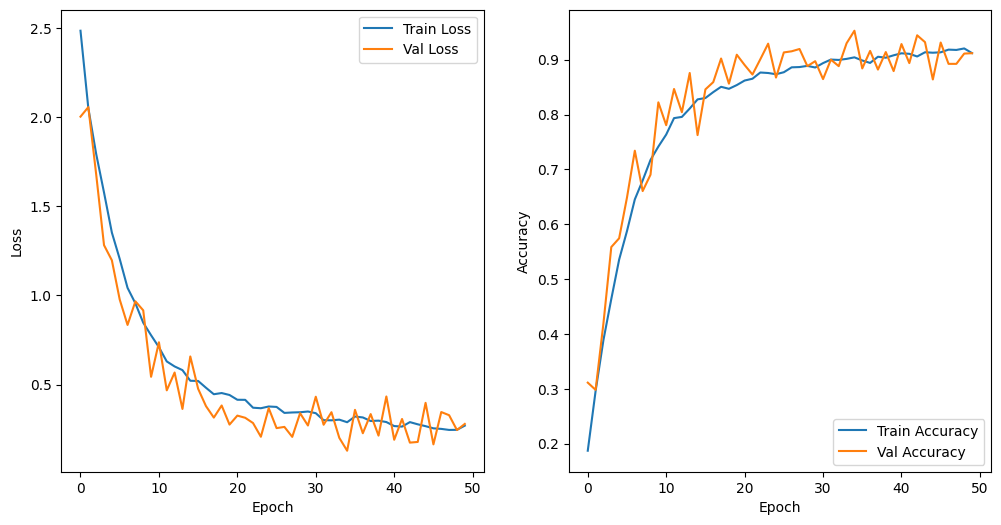

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Found 1464 images belonging to 12 classes.
23/23 [==============================] - 15s 616ms/step
Confusion Matrix:
[[114   0   0   0   0   0   1   0   0   0   3   2]
 [  0 119   0   0   0   0   0   0   0   0   0   1]
 [  2   0  92   0  10  11   6   4   1   9   6   3]
 [  0   0   0 118   0   0   0   0   1   0   0   1]
 [  0   0   0   0 120   0   0   0   0   0   0   0]
 [  4   0  24   3   4  42   6  11   5   5  10   6]
 [  0   0   0   0   0   0 117   0   2   0   0   1]
 [  0   0   0   0   0   0   0 119   1   0   0   0]
 [  0   0   0   3   0   0   1   0 114   0   1   1]
 [  0   0   0   1   3   0   4   0   1 108   0   3]
 [  0   0   0   0   0   0   0   1   1   0 112   6]
 [  0   0   0   2   0   0   4   0   0   1   0 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       120
           1       1.00      0.99      1.00       120
           2       0.79      0.64      0.71       144
           3       0.93      0

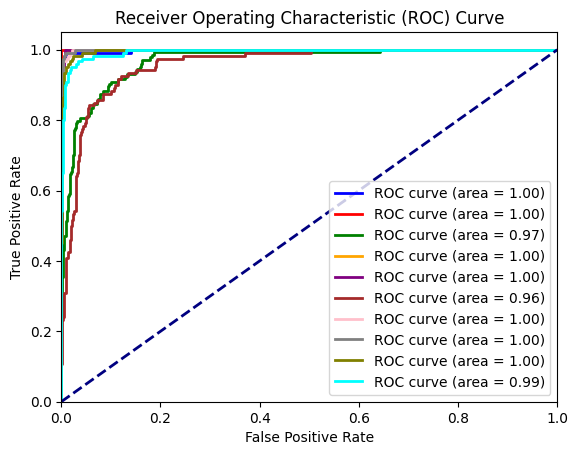

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)


y_true = test_set.classes
y_pred_probs = model.predict(test_set)

# If binary classification, use the first column of predictions
if y_pred_probs.shape[1] == 1:
    y_pred = (y_pred_probs > 0.5).astype(int)
    y_pred_probs = y_pred_probs.flatten()

    # Compute precision-recall curve and average precision
    precision, recall, _ = precision_recall_curve(y_true, y_pred_probs)
    average_precision = average_precision_score(y_true, y_pred_probs)

    # Plot precision-recall curve
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

else:  
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    
    num_classes = len(np.unique(y_true))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

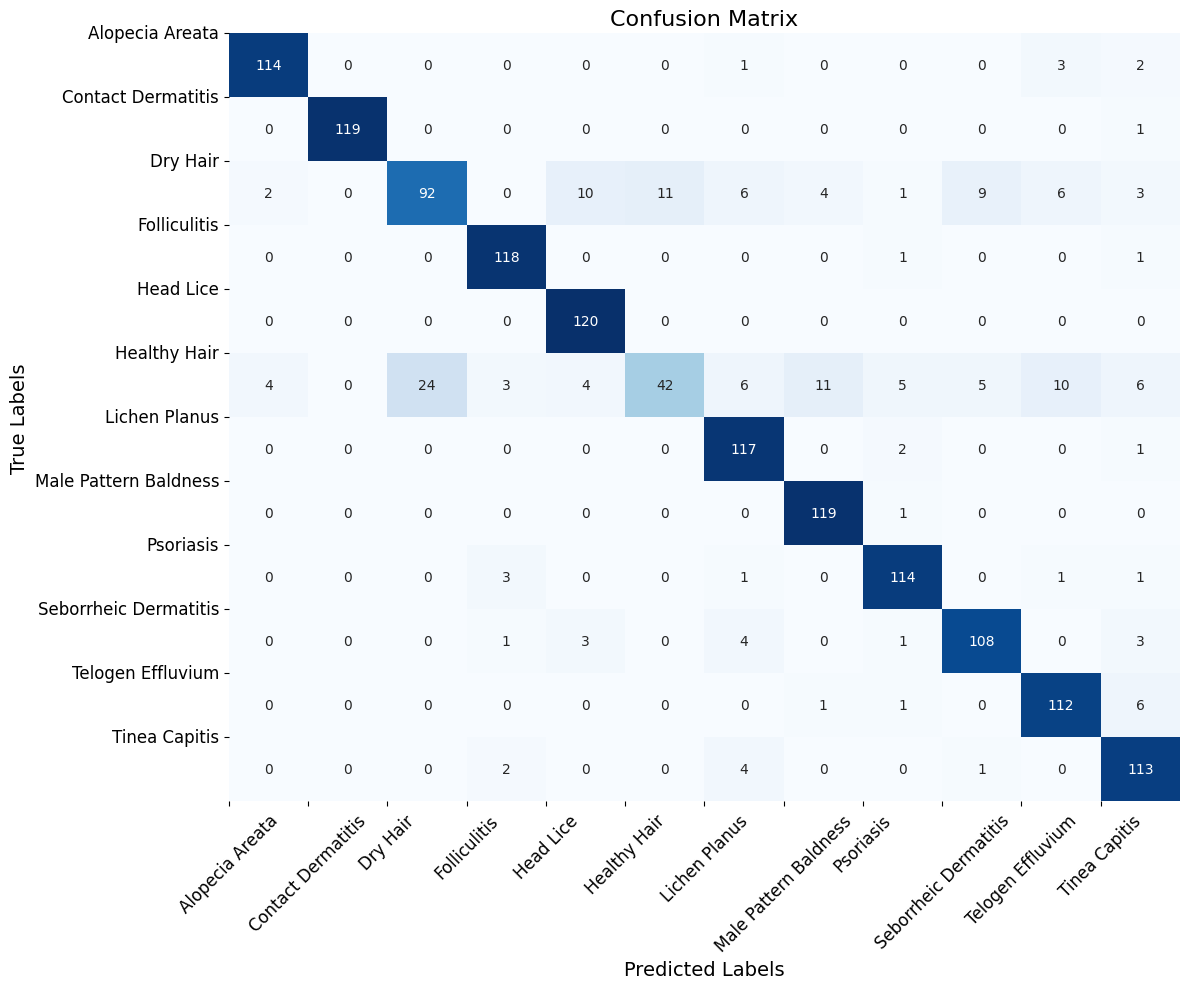

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(ticks=np.arange(len(test_set.class_indices)), labels=test_set.class_indices.keys(), fontsize=12, rotation=45)
plt.yticks(ticks=np.arange(len(test_set.class_indices)), labels=test_set.class_indices.keys(), fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

## Test Model

In [6]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np


input_size = (224,224)
channel = (3,)
input_shape = input_size + channel


labels = ['Alopecia Areata', 'Contact Dermatitis', 'Dry Hair', 'Folliculitis', 'Head Lice', 'Healthy Hair',
          'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis', 'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis']
print(labels)

['Alopecia Areata', 'Contact Dermatitis', 'Dry Hair', 'Folliculitis', 'Head Lice', 'Healthy Hair', 'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis', 'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis']


In [2]:

def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [3]:
from tensorflow.keras.models import load_model

In [4]:
MODEL_PATH = 'D:/HAY-MODEL/Hay-Models.h5'
model = load_model(MODEL_PATH,compile=False)

### Predict image #1

In [8]:
im = Image.open('Prediksi.jpeg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

1/1 [==============================] - 0s 56ms/step
Lichen Planus 0.9999894


## Predict image #2

In [10]:
im = Image.open('Prediksi2.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

1/1 [==============================] - 0s 50ms/step
Lichen Planus 0.9999894


## Predict image #3

In [13]:
im = Image.open('Prediksi3.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

1/1 [==============================] - 0s 111ms/step
Dry Hair 0.66758215
